In [33]:
import zipfile

# Path to the zip file
zip_path = '/content/GurNum-20230428T071927Z-001.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/GurNum-20230428T071927Z-001')

In [50]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import zipfile
import zipfile

# Path to the zip file
zip_path = '/content/GurNum-20230428T071927Z-001.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/GurNum-20230428T071927Z-001')
import os
import cv2
import numpy as np

# Path to the training and testing data
train_path = '/content/GurNum-20230428T071927Z-001/GurNum/train'
test_path = '/content/GurNum-20230428T071927Z-001/GurNum/val'

# Load the training data
X_train = []
y_train = []
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        X_train.append(image)
        y_train.append(int(folder))

# Load the testing data
X_test = []
y_test = []
for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        X_test.append(image)
        y_test.append(int(folder))

# Convert the lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [51]:
len(X_train)


1000

In [52]:
len(X_test)

178

In [53]:
X_train[0].shape

(32, 32)

In [54]:
X_train[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

1000
178
(1000, 32, 32)
(178, 32, 32)


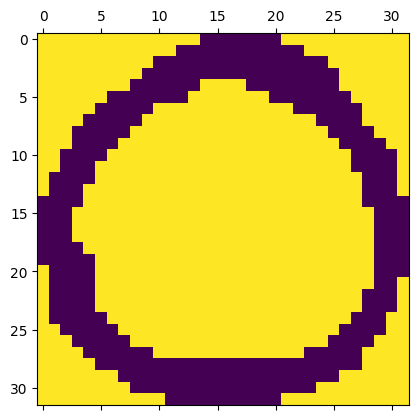

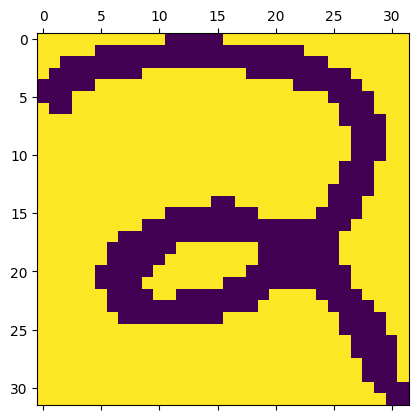

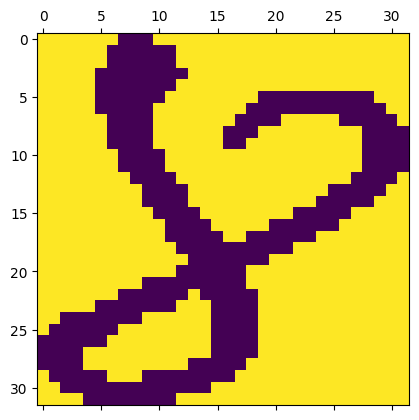

In [57]:
print(len(X_train))
print(len(X_test))
X_train[0].shape
X_train[0]
plt.matshow(X_train[0])
plt.matshow(X_train[999])
print(X_train.shape)
print(X_test.shape)
y_train
y_test
plt.matshow(X_test[150])

In [58]:
X_train = X_train / 255
X_test = X_test / 255

In [59]:
X_train[100]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [60]:
X_train_flattened = X_train.reshape(len(X_train), 32*32)
X_test_flattened = X_test.reshape(len(X_test), 32*32)


In [61]:
X_train_flattened.shape

(1000, 1024)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 1.5501 - accuracy: 0.5260
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.8960
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.9240
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.2527 - accuracy: 0.9400
Epoch 5/5
6/6 [==============================] - 0s 3ms/step
[0.02317514 0.02630382 0.203438   0.2854867  0.27631396 0.9914192
 0.06371962 0.1988729  0.11712609 0.00918344]


5

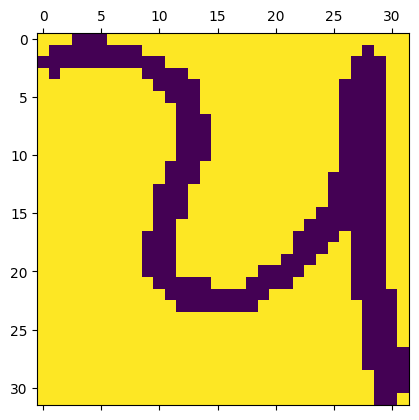

In [62]:
X_train_flattened[0]


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(1024,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)
model.evaluate(X_test_flattened, y_test)

y_predicted = model.predict(X_test_flattened)
print(y_predicted[100])
plt.matshow(X_test[100])
np.argmax(y_predicted[100])


In [63]:
model.evaluate(X_test_flattened, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.9157


[0.3468559682369232, 0.915730357170105]

In [64]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

6/6 [==============================] - 0s 2ms/step


array([0.99692976, 0.6741957 , 0.28210786, 0.02276431, 0.0453572 ,
       0.0990789 , 0.08743738, 0.33854324, 0.31779367, 0.11920359],
      dtype=float32)

In [65]:
np.argmax(y_predicted[100])

5

Epoch 1/5
32/32 [==============================] - 3s 9ms/step - loss: 1.2163 - accuracy: 0.6590
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.2900 - accuracy: 0.9320
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1755 - accuracy: 0.9580
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1278 - accuracy: 0.9730
Epoch 5/5
6/6 [==============================] - 0s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

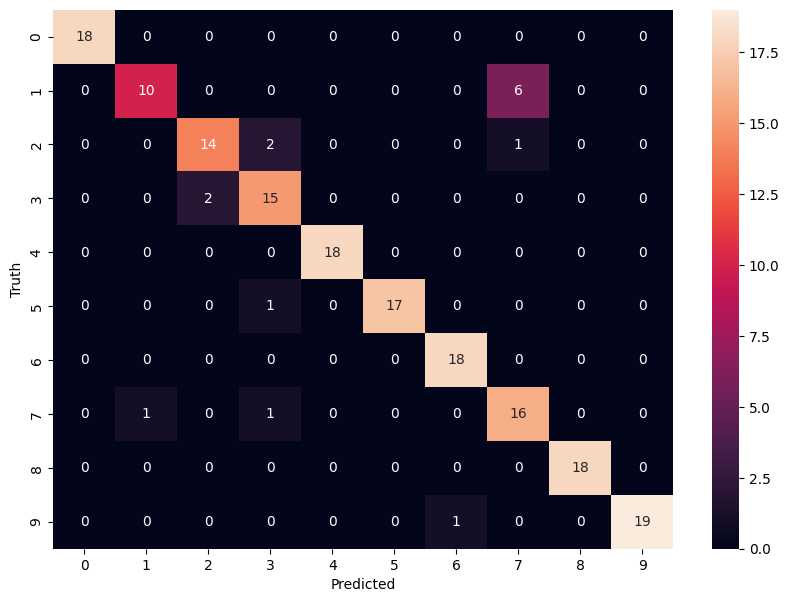

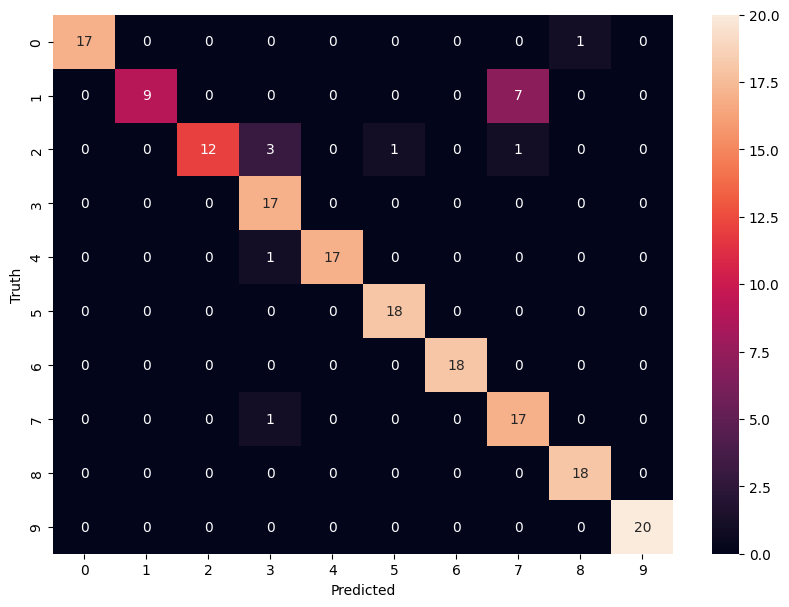

In [66]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)
model.evaluate(X_test_flattened,y_test)
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
